In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

from dealio.util.point_warp import for_point_warp
from dealio.util.extract import extraction_KTP_from_ocr

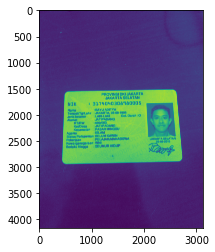

In [22]:
IMG_PATH = "test_KTP/img/IMG_20200615_125831.jpg"

img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

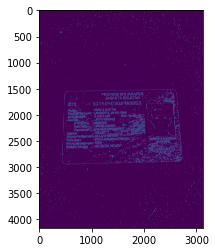

In [19]:
def blurring(src):
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    # plt.imshow(gray, cmap="gray")
    # plt.show()
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    # plt.imshow(blur, cmap="gray")
    # plt.show()
    return blur

def auto_canny(image, sigma=0.4):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    v = 100
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

blur = blurring(img)
canny = auto_canny(blur)

plt.imshow(canny)

In [15]:
contours, hierarchy = cv2.findContours(canny.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

our_cnt = []

for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
#    print(len(approx))
#    our_cnt.append(approx)
    if len(approx) == 4:
        our_cnt.append(approx)

In [14]:
for i in range(len(our_cnt)):
    plt.imshow(cv2.drawContours(img.copy(), [our_cnt[i]], -1, (0,255,0), 10))
    plt.show()

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
wrap = for_point_warp(our_cnt[0], gray)

plt.imshow(gray, cmap="gray")
plt.show()
plt.imshow(wrap, cmap="gray")
plt.show()

IndexError: list index out of range

In [7]:
result_ocr = pytesseract.image_to_string(wrap)
print(result_ocr)

PROVINSI JAWA BARAT
KABUPATEN CIAMIS

NIK : 3207107112960003
Nama ‘SISKA NUR AZIZAH
Tempat/Tg! Lahr CIAMIS, 31-12-1996
Jenis kelamin PEREMPUAN Got Darah -O
Alamat KAMPUNG LEGOK I

RTRW 004/001

Kel/Desa INDRAGIRI

Kecamatan PANAWANGAN

ISLAM

BELUM KAWIN
BELUM/TIDAK BEKERJA
WN

SEUMUR HIDUP

cans


In [8]:
information = extraction_KTP_from_ocr(result_ocr)
print("\n", information)


 {'nik': '3207107112960003', 'name': '‘SISKA NUR AZIZAH', 'dob': '31-12-1996', 'gender': 'female'}
